In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit,GridSearchCV
from sklearn.metrics import f1_score,make_scorer
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [4]:
df = pd.DataFrame(
    {
        'X1':[4,4,1,2.5,4.9,1.9,3.5,0.5,2,4.5],
        'X2':[2.9,4,2.5,1,4.5,1.9,4,1.5,2.1,2.5],
        'label' : [1,1,-1,-1,1,-1,1,-1,-1,1],
#         'dual':[0.414,0,0,0.018,0,0,0.018,0,0.014,0]
        
    }
    

)

In [5]:
X1 = df['X1']
X2 = df['X2']
y = df['label']

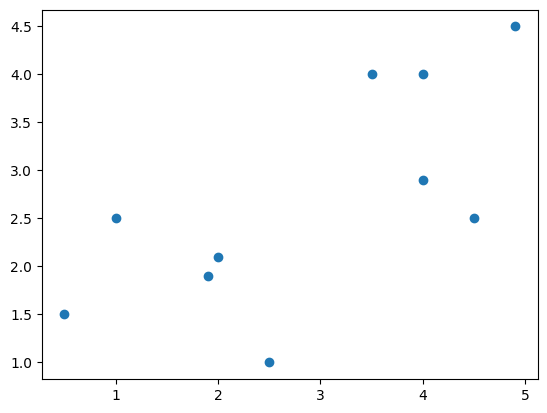

In [6]:
plt.scatter(X1, X2)
plt.show()

In [7]:
training_X = np.vstack((X1, X2)).T
training_y = [1,1,-1,-1,1,-1,1,-1,-1,1]

In [8]:
clf = svm.SVC(kernel='linear', C=1.0)

In [9]:
clf.fit(training_X, training_y)

SVC(kernel='linear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


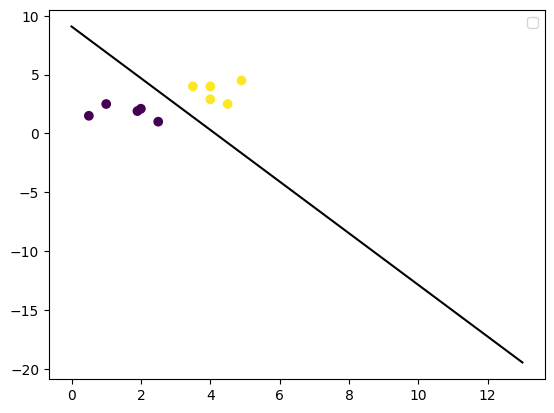

In [10]:

w = clf.coef_[0]

a = -w[0] / w[1]


XX = np.linspace(0, 13)


yy = a * XX - clf.intercept_[0] / w[1]


plt.plot(XX, yy, 'k-')


plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

In [11]:
circle_X, circle_y = datasets.make_circles(n_samples=100, noise=0.05)

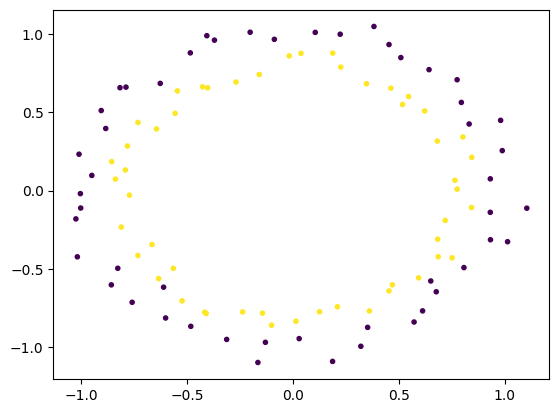

In [12]:
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [13]:
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [14]:
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [15]:
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)


    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

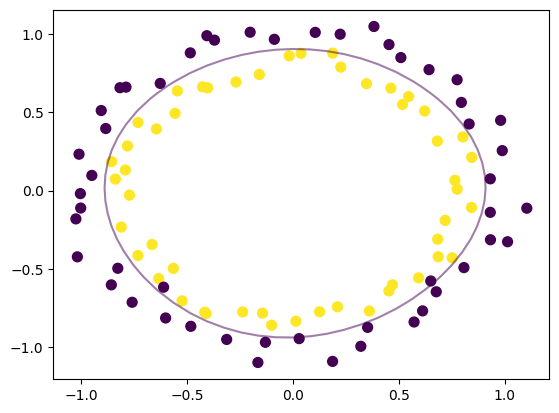

In [16]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

In [17]:
df

,X1,X2,label
0,4.0,2.9,1
1,4.0,4.0,1
2,1.0,2.5,-1
3,2.5,1.0,-1
4,4.9,4.5,1
5,1.9,1.9,-1
6,3.5,4.0,1
7,0.5,1.5,-1
8,2.0,2.1,-1
9,4.5,2.5,1


<AxesSubplot: >

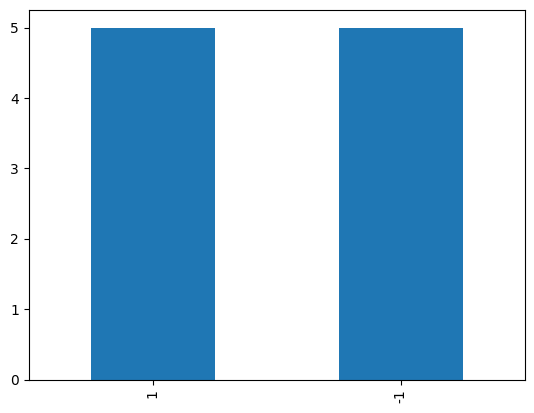

In [18]:
df['label'].value_counts().plot.bar()

In [19]:
X = df.drop(['label'], axis=1)

y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
svc=SVC() 
svc.fit(X_train,y_train)

NameError: name 'SVC' is not defined

In [ ]:
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=3.0) 

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
params={
    'gamma':[0.414,0,0,0.018,0,0,0.018,0,0.014,0],
    'C':[3],
    'kernel':['rbf']
}
grid=GridSearchCV(clf,param_grid=params,scoring=make_scorer(f1_score))

In [ ]:
grid_clf=grid.fit(X_train,y_train)

C:\Python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python37\lib\site-packages\sklearn\svm\_base.py", line 237, in fit
    raise ValueError(msg)
ValueError: gamma value must be > 0; 0 is invalid. 

In [ ]:
grid_clf.best_estimator_

SVC(C=3, gamma=0.414)

In [ ]:
grid_best=grid_clf.best_estimator_
y_grid_pred=grid_best.predict(X_test)
print(confusion_matrix(y_grid_pred,y_test))
print(classification_report(y_grid_pred,y_test))

[[2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

